## EDA Dataset Servicios Funerarios

In [ ]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Lectura de los archivos csv*** 

In [3]:
Benfs = pd.read_csv('Beneficiarios.csv', sep= '\t',encoding = 'utf-16-le') # Beneficiarios
Comps = pd.read_csv('Complementarios.csv',sep=';') #Complementarios
Contrs = pd.read_csv('Contratos.csv', sep=';') #Contratos 
Serfun = pd.read_csv('SerFun.xls.csv',sep=';') #Servicios funerarios 
municipios = pd.read_excel('Codigos Dane municipios.xlsx')

In [4]:
print("filas de beneficiarios", Benfs.shape[0])
print("filas de Complementarios", Comps.shape[0])
print("filas de Contratos", Contrs.shape[0])
print("filas de Servicios funerarios", Serfun.shape[0])
print("filas de los municipios", municipios.shape[0])

filas de beneficiarios 893279
filas de Complementarios 265185
filas de Contratos 391300
filas de Servicios funerarios 40225
filas de los municipios 1125


In [5]:
Serfun.drop_duplicates()

,DocNum,Tipo Prestacion,CreateDate,DocEntry,Ciudad Fallecimiento,Fecha Fallecimiento,Edad,Causa,Parentesco
0,2002468,Previsión Exequial,10/05/2019,7576.0,11001.0,10/05/2019,26,ACCIDENTAL,HIJO (A)
1,2025926,No Prestado,13/02/2022,463523.0,13430.0,12/02/2022,68,NATURAL,ABUELO (A)
2,2025551,No Prestado,30/01/2022,23746.0,25307.0,30/01/2022,84,NATURAL,MADRE
3,2025373,No Prestado,24/01/2022,49526.0,5001.0,24/01/2022,32,NATURAL,ESPOSO (A)
4,2025790,Particular,7/02/2022,NaN,76001.0,6/02/2022,66,NATURAL,OTRO
...,...,...,...,...,...,...,...,...,...
40220,2019652,Previsión Exequial,29/05/2021,250178.0,11001.0,29/05/2021,12,NATURAL,CAN PEQUEÑO
40221,2019702,Previsión Exequial,30/05/2021,383066.0,11001.0,30/05/2021,9,NATURAL,CAN PEQUEÑO
40222,2019952,No Prestado,7/06/2021,393777.0,8001.0,7/06/2021,79,NATURAL,PADRE
40223,2019874,Previsión Exequial,4/06/2021,382749.0,11001.0,4/06/2021,11,NATURAL,CAN PEQUEÑO


In [6]:
print("filas de Servicios funerarios", Serfun.shape[0])

filas de Servicios funerarios 40225


In [7]:
Serfun.isna().any()

DocNum                  False
Tipo Prestacion         False
CreateDate              False
DocEntry                 True
Ciudad Fallecimiento     True
Fecha Fallecimiento     False
Edad                    False
Causa                    True
Parentesco               True
dtype: bool

Datos faltantes para los dataset True -> faltan datos, False-> Completo

**Benfs** 

    '#'                    False
    DocEntry               False
    Sexo                    True
    Numero de Documento    False
    Parentesco             False
    Fecha Nacimiento        True
    Fecha Retiro            True
    Fecha Siniestro         True
    Fecha Crea Contrato    False
    
**Comps**

    Docentry               False
    Sexo                    True
    Código Seguro          False
    Nombre Seguro          False
    F. nacimiento           True
    F. retiro compl.        True
    CreateDate             False
    Tipo complementario    False
  
**Contrs**

    Doc entry              False
    Nombre UEN             False
    Nombre Sub UEN         False
    Convenio actual        False
    Nombre Convenio        False
    Fecha real contrato    False
    Numero Contrato         True
    Estado del Contrato    False
    Tipo de Contrato       False
    Codigo plan            False
    Nombre Plan            False
    Sucursal               False

**Serfun**

    DocNum                  False
    Tipo Prestacion         False
    CreateDate              False
    DocEntry                 True
    Ciudad Fallecimiento     True
    Fecha Fallecimiento     False
    Edad                    False
    Causa                    True
    Parentesco               True
    

Columnas de los archivos:
**nombre**- Tipo que debería ser - tipo en los dataset - Definición 

1. **Benfs**
    * **#** - Unique identifier for the review
    * **DocEntry** - INTEGER - int64 - Identificador de los contratos
    * **Sexo** - STRING - object-  Genero del beneficiario
    * **Numero de  Documento** STRING- object-  Documento del beneficiario
    * **Parentesco** STRING- object- Parentesco del beneficiario con el titular del contrato
    * **Fecha Nacimiento** - DATE - object- Fecha de nacimiento del beneficiario
    * **Fecha Retiro** -DATE- object- Fecha de retiro del beneficiario
    * **Fecha Siniestro** DATE- object- Fecha de fallecimiento del beneficiario
    * **Fecha Crea Contrato** -DATE- object- Fecha de ingreso del beneficiario
    
    
2. **Comps**
    * **Docentry** -INTEGER- Identificador de los contratos
    * **Sexo-** STRING -object-  Genero del titular del complementario
    * **Código Seguro** -STRING- object- Codigo interno del complementario
    * **Nombre Seguro** -STRING- object- Nombre del seguro a comercializar
    * **F. nacimiento** -DATE- object- Fecha de nacimiento del titular del complementario
    * **F. retiro compl.** -DATE- object- Fecha de retiro del complementario
    * **CreateDate** -DATE- object- Fecha de creacion del complementario
    * **Tipo complementario** -STRING- object- Clasificacion del complementario
 
    
    
3. **Contrs**
    * **Doc entry** -INTEGER- int64- Identificador de los contratos
    * **Nombre UEN** -STRING- object- Unidad estratigica de negocio (Sector en el cual se comecializa)
    * **Nombre Sub UEN**-STRING- object- Sub Unidad estratigica de negocio (Sector especifico en el cual se comecializa)
    * **Convenio actual** -INTEGER- int64-  Codigo interno de empresa en la que se comercializo
    * **Nombre Convenio** -STRING- object- Nombre de empresa en la que se comercializo
    * **Fecha real contrato** -DATE- object- Fecha en la que se comercializo el contrato
    * **Numero Contrato** -STRING- object- Numero del contrato fisico o digital
    * **Estado del Contrato** -STRING- object- Estado del cliente en la base de datos
    * **Tipo de Contrato** -STRING- object- Clasificacion del contrato según la antigüedad del cliente
    * **Codigo plan** -STRING- object- Codigo interno del plan que se comercializo
    * **Nombre Plan** -STRING- object- Nombre del plan que se comercializo
    * **Sucursal** -STRING- object- Sede en la que se comercizo el contrato
   
4. **Serfun**
    * **DocNum** -INTEGER- int64 -Identificador del servicio funerario
    * **Tipo Prestacion** -STRING- object-  Clasificacion de la prestacion del servicio
    * **CreateDate** -DATE- object- fecha de creacion del servicio en el sistema
    * **DocEntry** -INTEGER- float64-  Identificador de los contratos
    * **Ciudad Fallecimiento** -INTEGER- float64-  Codigo del municipio de fallecimiento
    * **Fecha Fallecimiento** -DATE- object- Fecha de fallecimiento del cliente
    * **Edad** -INTEGER- int64- Edad del fallecido
    * **Causa** -STRING- object- Causal del fellecimiento del cliente
    * **Parentesco** -STRING- object- Parentesco del beneficiario fallecido con el titular del contrato


**Primera exploración para servicios funerarios**

- Encontrar comportamientos para edad, ciudad, causa, fecha fallecimiento
- Explorar el tipo de prestación 
- tomar diagramas de barras para todos en general, luego por ciudad. 



In [8]:
Serfun.isna().any()

DocNum                  False
Tipo Prestacion         False
CreateDate              False
DocEntry                 True
Ciudad Fallecimiento     True
Fecha Fallecimiento     False
Edad                    False
Causa                    True
Parentesco               True
dtype: bool

In [9]:
Serfun.head()
#TODOS LOS CAMPOS VACIOS NO PUEDEN SER INTERPOLADOS, YA QUE NO DICTAN UN PATRÓN 
#SON SOLO UNA DEFINICIÓN, POR TANTO ES MEJOR LLENAR CON "NO ESPECIFICADO" O "NO DISPONIBLE"

#Causa, se puede llenar con, "NO ESPECIFICADA"
#Parentezco, se podría llenar con "NO ESPECIFICADO" dada la no especificación 
#DocEntry se podría llenar con .fillna("NO DISPONIBLE"), será importante cuando se unan tablas 
#Ciudad de fallecimiento, se podrían llenar con ("NO DISPONIBLE") al momento de realizar el análisis para las ciudades 



,DocNum,Tipo Prestacion,CreateDate,DocEntry,Ciudad Fallecimiento,Fecha Fallecimiento,Edad,Causa,Parentesco
0,2002468,Previsión Exequial,10/05/2019,7576.0,11001.0,10/05/2019,26,ACCIDENTAL,HIJO (A)
1,2025926,No Prestado,13/02/2022,463523.0,13430.0,12/02/2022,68,NATURAL,ABUELO (A)
2,2025551,No Prestado,30/01/2022,23746.0,25307.0,30/01/2022,84,NATURAL,MADRE
3,2025373,No Prestado,24/01/2022,49526.0,5001.0,24/01/2022,32,NATURAL,ESPOSO (A)
4,2025790,Particular,7/02/2022,NaN,76001.0,6/02/2022,66,NATURAL,OTRO


In [10]:
#LLENADO DE LOS DATOS FALTANTAS:

Serfun['Causa'].fillna('NO ESPECIFICADA', inplace=True)
Serfun['Parentesco'].fillna('NO ESPECIFICADO', inplace=True)
Serfun['DocEntry'].fillna('NO DISPONIBLE', inplace=True)
Serfun['Ciudad Fallecimiento'].fillna('NO DISPONIBLE', inplace=True)
Serfun["Ciudad Fallecimiento"].unique()



array([11001.0, 13430.0, 25307.0, 5001.0, 76001.0, 25754.0, 68755.0,
       68432.0, 23001.0, 25151.0, 50313.0, 52001.0, 20001.0, 8001.0,
       68679.0, 15001.0, 73268.0, 13001.0, 15531.0, 50006.0, 86001.0,
       73443.0, 18001.0, 66001.0, 17174.0, 41001.0, 25807.0, 19001.0,
       50001.0, 66682.0, 63001.0, 73520.0, 52378.0, 68001.0, 25175.0,
       73001.0, 70001.0, 47545.0, 25899.0, 5756.0, 76736.0, 47001.0,
       27001.0, 15464.0, 86568.0, 15673.0, 73352.0, 5360.0, 25290.0,
       68229.0, 54001.0, 76834.0, 8638.0, 8758.0, 44430.0, 91001.0,
       41298.0, 25269.0, 15646.0, 52835.0, 85001.0, 17001.0, 73585.0,
       44378.0, 25645.0, 86219.0, 19809.0, 5631.0, 25718.0, 52683.0,
       5604.0, 19022.0, 41551.0, 15516.0, 52786.0, 18094.0, 5266.0,
       86865.0, 68276.0, 15092.0, 54099.0, 41319.0, 25286.0, 76520.0,
       13657.0, 25839.0, 54405.0, 70523.0, 44001.0, 73168.0, 18479.0,
       41483.0, 5234.0, 8078.0, 76616.0, 52356.0, 68547.0, 41359.0,
       73217.0, 25168.0, 23555.

**ANÁLISIS DE LOS DATOS** 

**Tipo prestación :** 
"['Previsión Exequial', 'No Prestado', 'Particular', 'Reembolsos',
       'Apoyo', 'Prenecesidad']"
       
no se identifica bien el significado de NO PRESTADO, REEMBOLSOS Y APOYO, estos no entran como ganancia para la empresa?. 
Según el diccionario, lo que se tiene no es el tipo de prestación, se tiene el tipo de servicio 

**Ciudad Fallecimiento** : Los datos se encuentran como códigos, posiblemente del DANE 

**edad** : Entero de las edades, tener cuidado con los valores atípicos 

**Causa** :
['ACCIDENTAL', 'NATURAL', 'COVID 19', 'SUICIDIO', 'HOMICIDIO',
       'NO ESPECIFICADA', 'SOSPECHA COVID 19', 'EN ESTUDIO']
       
Tener en cuenta que las causas son también para las mascotas


**Parentezco**:
['HIJO (A)', 'ABUELO (A)', 'MADRE', 'ESPOSO (A)', 'OTRO', 'PADRE',
       'ASEGURADO PRINCIPAL', 'PADRASTRO', 'SUEGRO (A)', 'TIO (A)',
       'COMPAÑERO (A)', 'HERMANO (A)', 'PRIMO (A)', 'SOBRINO (A)',
       'TITULAR', 'CAN GRANDE', 'MADRASTRA', 'NIETO (A)', 'CUÑADO (A)',
       'CAN PEQUEÑO', 'NUERA', 'HIJASTRO (A)', 'FELINO', 'YERNO',
       'HERMANO (A) DISCAPA', 'CONTRATANTE', 'HIJO (A) DISCAPA',
       'NO ESPECIFICADO', 'ADULTO MAYOR'] 
       
Se encuentra que en parentezco se detalla que las muertes no son solo para las personas, también se
encuentran las muertes debido a las mascotas, por lo tanto es mejor sacar dos subset_df donde uno sea los fallecimientos para personas y otro para las mascotas.




In [11]:
#SE CORROBORA QUE NO EXISTAN VALORES VACIOS 
Serfun.isna().any()

DocNum                  False
Tipo Prestacion         False
CreateDate              False
DocEntry                False
Ciudad Fallecimiento    False
Fecha Fallecimiento     False
Edad                    False
Causa                   False
Parentesco              False
dtype: bool

In [12]:
#SACAR LOS SUBSET PARA PERSONAS Y MASCOTAS, ASÍ SE PUEDE OBSERVAR MEJOR LA RELACIÓN, YA SEA PARA 
#EDADES O DEMAS 
#En los dos subset no se tendrán en cuenta los no especificado, ya que no se sabe si serán peronas 
# o mascotas, preguntar si "OTRO" cuenta como persona 
persona = ['HIJO (A)', 'ABUELO (A)', 'MADRE', 'ESPOSO (A)', 'OTRO', 'PADRE',
       'ASEGURADO PRINCIPAL', 'PADRASTRO', 'SUEGRO (A)', 'TIO (A)',
       'COMPAÑERO (A)', 'HERMANO (A)', 'PRIMO (A)', 'SOBRINO (A)',
       'TITULAR', 'MADRASTRA', 'NIETO (A)', 'CUÑADO (A)',
       'NUERA', 'HIJASTRO (A)',  'YERNO',
       'HERMANO (A) DISCAPA', 'CONTRATANTE', 'HIJO (A) DISCAPA', 'ADULTO MAYOR'] 

mascota = ['CAN GRANDE', 'CAN PEQUEÑO',  'FELINO'] 
df_personas = Serfun[Serfun["Parentesco"].isin(persona)]
df_personas #39781

df_mascotas = Serfun[Serfun["Parentesco"].isin(mascota)]
df_mascotas.head() #443


,DocNum,Tipo Prestacion,CreateDate,DocEntry,Ciudad Fallecimiento,Fecha Fallecimiento,Edad,Causa,Parentesco
57,2008223,Previsión Exequial,21/03/2020,379678.0,11001.0,21/03/2020,4,NATURAL,CAN GRANDE
126,2011230,Previsión Exequial,6/08/2020,391932.0,5001.0,6/08/2020,7,NATURAL,CAN PEQUEÑO
230,2012021,No Prestado,3/09/2020,415749.0,11001.0,3/09/2020,5,NATURAL,CAN GRANDE
269,2012336,Previsión Exequial,16/09/2020,251800.0,17001.0,16/09/2020,10,NATURAL,CAN PEQUEÑO
350,2013721,Previsión Exequial,9/11/2020,323964.0,17001.0,9/11/2020,12,NATURAL,CAN GRANDE


**Nota** Se revisa cual es la causa de mayor mortalidad en los registros 

In [13]:
#agrupar por causa de la muerte 
Causas = df_personas.groupby('Causa').size().reset_index()
Causas.head()


,Causa,0
0,ACCIDENTAL,819
1,COVID 19,2586
2,EN ESTUDIO,375
3,HOMICIDIO,813
4,NATURAL,34073


Text(0.5, 1.0, 'Causas de fallecimiento vs total fallecimientos')

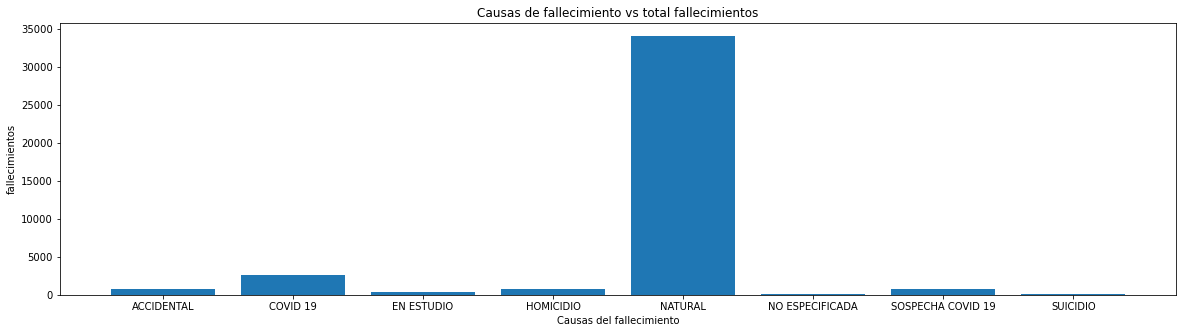

In [14]:
Causas.columns = ["CAUSAS","Total_fallecimientos"] #rename column 
#accident_hour["HOUR"] = accident_hour["HOUR"].astype(str) #the column "HOUR" is transformed to string 

#plot with matplotlib
plt.figure(figsize=(20,5))
plt.bar(Causas["CAUSAS"],Causas["Total_fallecimientos"])
plt.ylabel("fallecimientos")
plt.xlabel("Causas del fallecimiento")
plt.title("Causas de fallecimiento vs total fallecimientos")

**Notas** 
La causa de mayor número de fallecimientos es por causa Natural, la siguiente es por covid 19, seguida por sospecha de covid, accidental y homicidio. la de covid y sospecha de covid deberían disminuir al pasar el tiempo, ya que, la pandemia a ido disminuyendo gracias a la vacunación masiva. estos son datos recopilados a lo largo del tiempo. Será bueno revisar estos tipos de casos en meses  

**Siguiente paso** Se reliza el análisis de las muertes por año 

In [15]:
#Cantidad de muertes por año 

df_copy  = df_personas.copy()
df_copy["Fecha Fallecimiento"] = pd.to_datetime(df_copy["Fecha Fallecimiento"])
df_copy["YEAR"] = df_copy["Fecha Fallecimiento"].dt.to_period('Y')
YEAR = df_copy.groupby("YEAR").size().reset_index()
YEAR.head()

,YEAR,0
0,2016,1090
1,2017,6369
2,2018,6353
3,2019,6546
4,2020,8175


Text(0.5, 1.0, 'AÑO de fallecimiento vs total fallecimientos')

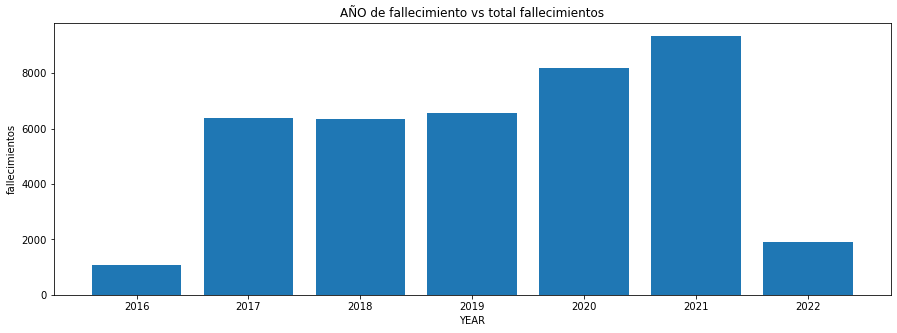

In [16]:
#GRAFICA DE FALLECIMIENTOS POR AÑO 
YEAR.columns = ["YEAR","Total_fallecimientos"] #rename column 
YEAR["YEAR"] = YEAR["YEAR"].astype(str)

#plot with matplotlib
plt.figure(figsize=(15,5))
plt.bar(YEAR["YEAR"],YEAR["Total_fallecimientos"])
plt.ylabel("fallecimientos")
plt.xlabel("YEAR")
plt.title("AÑO de fallecimiento vs total fallecimientos")

El año con mayor cantidad de defunciones es 2021 seguido (por 2020 posiblemente se deba a la pandemia), 
se revisará las causas para cada año, mirar si en efecto el covid es el mayor causante de los 
fallecimientos, dado el caso que no, explorar porqué aumento la cantidad de muertes estos y años 
y porqué disminuyó tanto en 2022 siendo este el menor año posible despues de 2016 

In [17]:
#por año y por tipo de fallecimiento 

df_copy  = df_personas.copy()
df_copy["Fecha Fallecimiento"] = pd.to_datetime(df_copy["Fecha Fallecimiento"])
df_copy["YEAR"] = df_copy["Fecha Fallecimiento"].dt.to_period('Y')
YEAR_CAUSA = df_copy.groupby(["YEAR", "Causa"]).size()
YEAR_CAUSA.head(20)
years = ["2016","2017","2018","2019","2020","2021","2022"]
causas_per_year = []

for year in years:
    causas_per_year.append(YEAR_CAUSA[year].reset_index())

causas_per_year[0]


,Causa,0
0,ACCIDENTAL,28
1,EN ESTUDIO,16
2,HOMICIDIO,23
3,NATURAL,1006
4,NO ESPECIFICADA,14
5,SUICIDIO,3


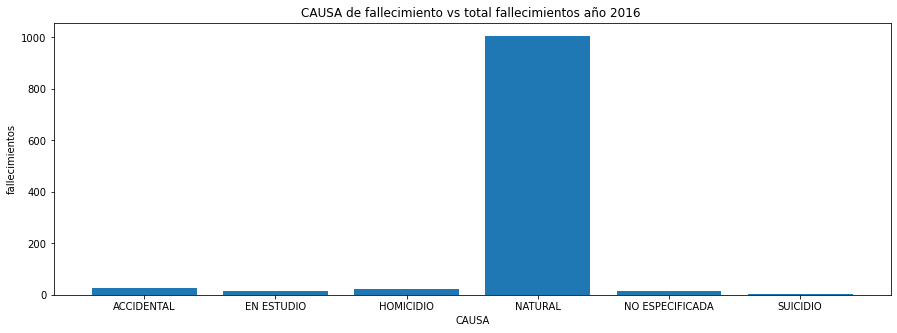

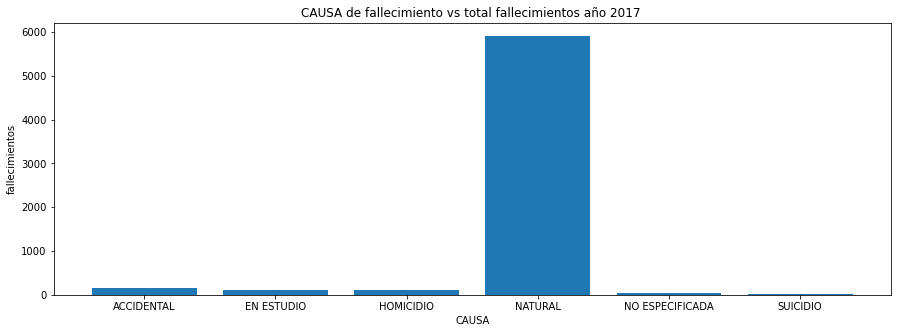

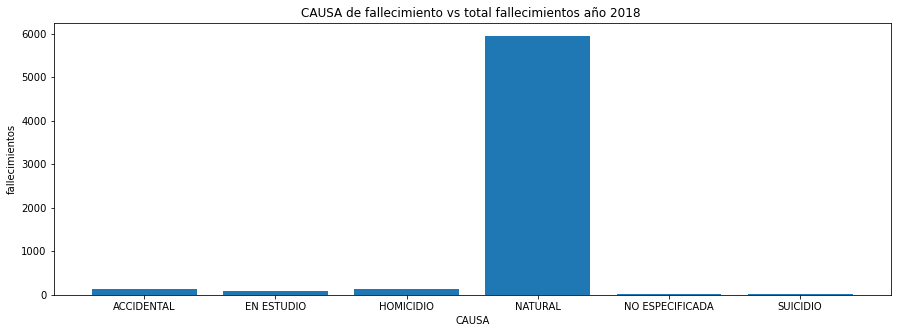

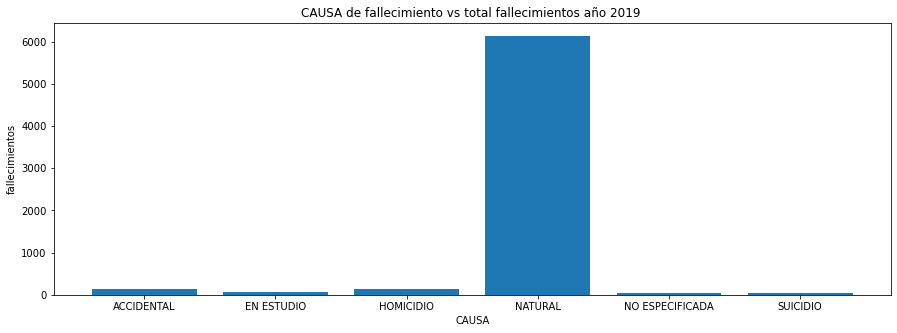

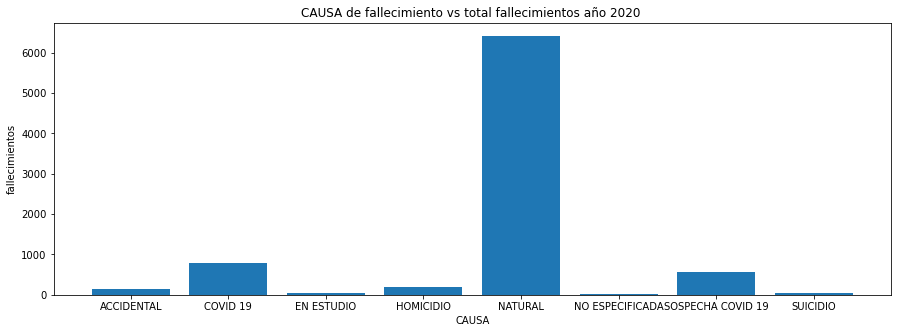

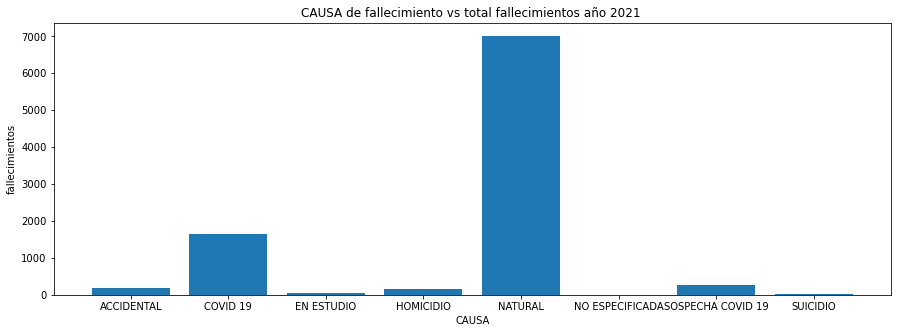

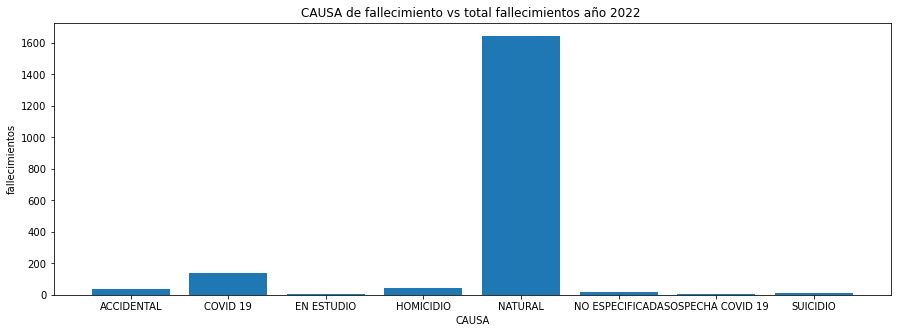

In [18]:
for i , causas_y in enumerate(causas_per_year): 
    causas_y.columns = ["CAUSA","Total_fallecimientos"] #rename column 
  

    #plot with matplotlib
    plt.figure(figsize=(15,5))
    plt.bar(causas_y["CAUSA"],causas_y["Total_fallecimientos"])
    plt.ylabel("fallecimientos")
    plt.xlabel("CAUSA")
    plt.title("CAUSA de fallecimiento vs total fallecimientos año {} ".format(years[i]))
    plt.show()

**Nota** Se encontró que en cada año, el mayor causante de fallecimientos es por muerte natural, encontrando que posiblemente la suposición inicial fuera erronea (muertes por covid), sin embargo, se revisará si las cantidad de muertes naturales varía demaciado entre cada año, para corroborar o descartar la suposición  

Text(0.5, 1.0, 'AÑO de fallecimiento vs total fallecimientos de causa natural')

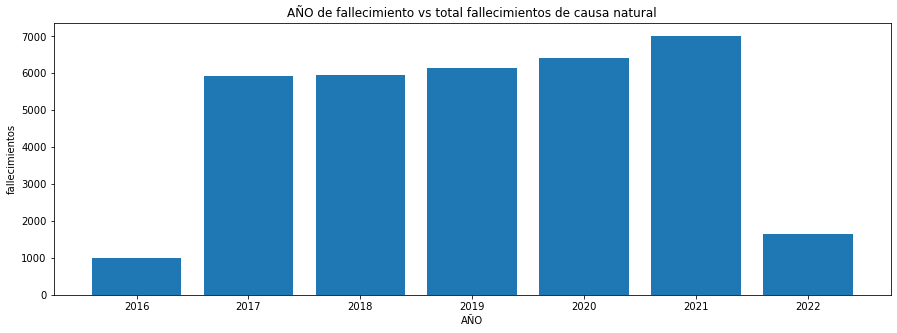

In [19]:
#sacar solo las muertes naturales por año 
df_copy
subset_df = df_copy[df_copy["Causa"] == "NATURAL"]
Natural_year = subset_df.groupby(["YEAR"]).size().reset_index()
Natural_year.columns = ["AÑO","Total_fallecimientos_causa_Natural"]
Natural_year["AÑO"] = Natural_year["AÑO"].astype(str)
plt.figure(figsize=(15,5))
plt.bar(Natural_year["AÑO"],Natural_year["Total_fallecimientos_causa_Natural"])
plt.ylabel("fallecimientos")
plt.xlabel("AÑO")
plt.title("AÑO de fallecimiento vs total fallecimientos de causa natural")

**Nota** Se encontró que el mayor número de muertes por causas naturales se dió en 2021, seguido por 2020, sin embargo, el número de muertes para los años anteriores al covid por muerte natural no difieren demaciado como se esperaba (por ejemplo 2016), es posible que esto tenga que ver con la cantidad de afiliados por año y la edad de los afiliados, dando este patrón de aumento en 5 años, para luego decaer, como lo ocurrido en 2022. 

Suposición: Como el mayor contriguyente a las defunciones es por causas naturales, se revisarán como se comportan las edades para estas personas, con el fin de encontrar la justificación de esta cantidad para los diferentes años 


**Siguiente paso** Se agrupan los datos por año y por edad, dado que el rango de edades es amplio 
se decidió tomar cada gráfica independiente, utilizando para esto un ciclo for. Además permite revisar si existen datos atípicos en las edades. Añadido a esto, se tomarán la cantidad de fallecimientos total y las estadísticas descriptivas de los datos 

cantidad de fallecidos 1006
             EDAD  Total_fallecimiento_natural
count   92.000000                    92.000000
mean    55.673913                    10.934783
std     27.981198                    10.318877
min      0.000000                     1.000000
25%     32.750000                     2.000000
50%     56.500000                     7.000000
75%     79.250000                    17.000000
max    104.000000                    53.000000


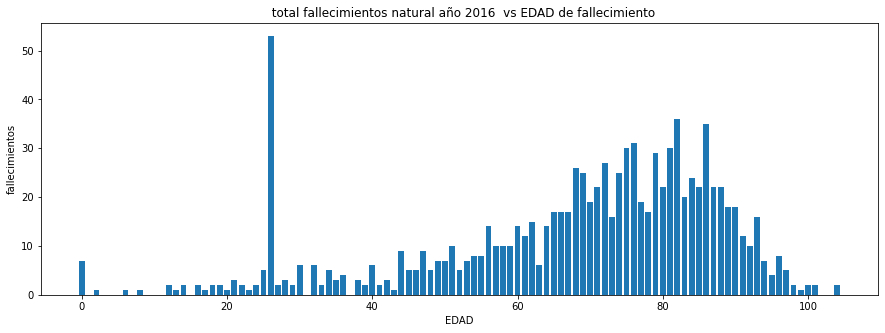

cantidad de fallecidos 5913
             EDAD  Total_fallecimiento_natural
count  111.000000                   111.000000
mean    53.036036                    53.270270
std     35.850682                    55.536384
min    -71.000000                     1.000000
25%     25.500000                     6.500000
50%     53.000000                    27.000000
75%     80.500000                    91.000000
max    182.000000                   184.000000


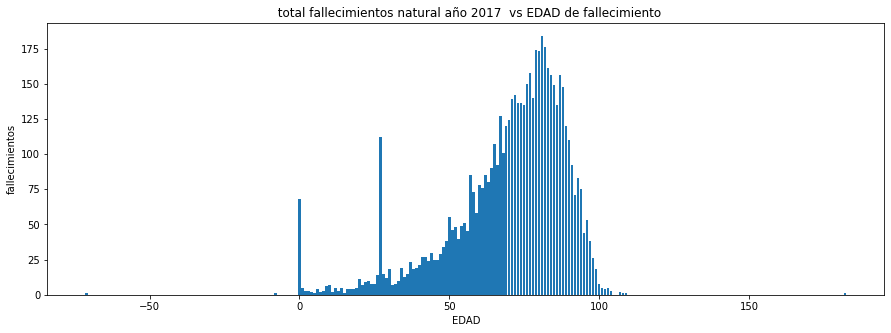

cantidad de fallecidos 5947
             EDAD  Total_fallecimiento_natural
count  106.000000                   106.000000
mean    51.698113                    56.103774
std     32.823676                    56.184378
min    -71.000000                     1.000000
25%     26.250000                     9.000000
50%     52.500000                    30.500000
75%     78.750000                    99.500000
max    106.000000                   185.000000


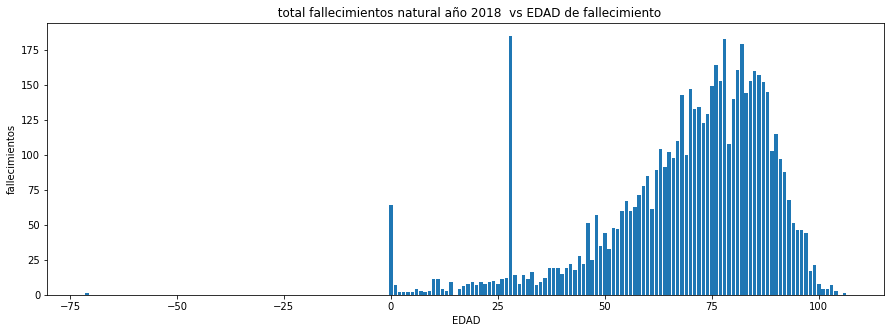

cantidad de fallecidos 6138
             EDAD  Total_fallecimiento_natural
count  110.000000                   110.000000
mean    54.363636                    55.800000
std     34.110110                    62.103317
min     -1.000000                     1.000000
25%     26.250000                     9.000000
50%     53.500000                    25.500000
75%     80.750000                   102.250000
max    182.000000                   361.000000


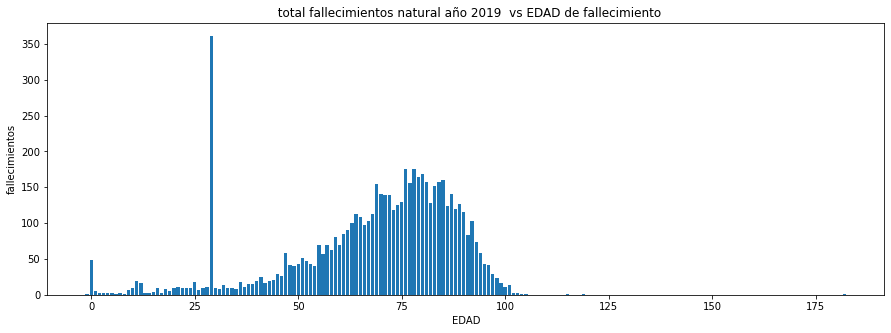

cantidad de fallecidos 6414
             EDAD  Total_fallecimiento_natural
count  108.000000                   108.000000
mean    53.222222                    59.388889
std     33.352923                    65.963858
min     -1.000000                     1.000000
25%     25.750000                     8.000000
50%     52.500000                    27.000000
75%     79.250000                   100.750000
max    182.000000                   403.000000


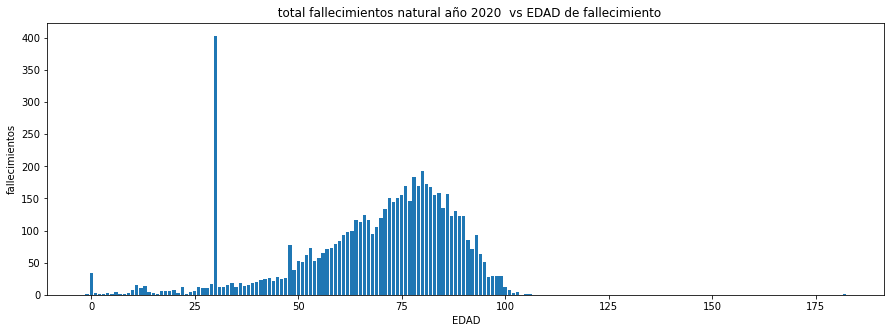

cantidad de fallecidos 7010
             EDAD  Total_fallecimiento_natural
count  110.000000                   110.000000
mean    56.390909                    63.727273
std     34.321763                    68.253428
min      0.000000                     1.000000
25%     28.250000                     7.000000
50%     55.500000                    30.000000
75%     82.750000                   120.500000
max    187.000000                   267.000000


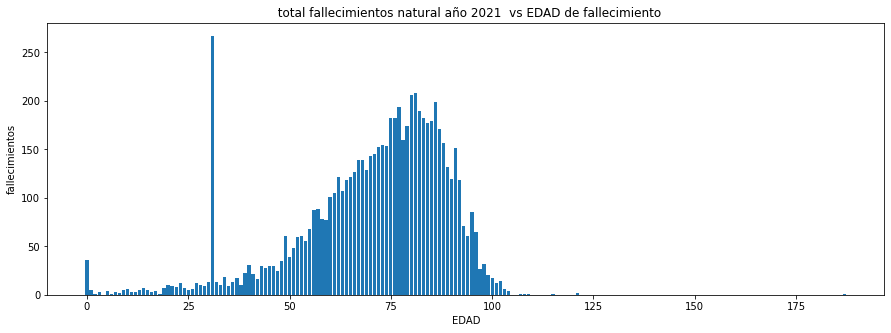

cantidad de fallecidos 1645
             EDAD  Total_fallecimiento_natural
count   95.000000                    95.000000
mean    55.200000                    17.315789
std     28.881121                    17.259757
min     -1.000000                     1.000000
25%     32.500000                     3.000000
50%     56.000000                     9.000000
75%     79.500000                    28.500000
max    103.000000                    62.000000


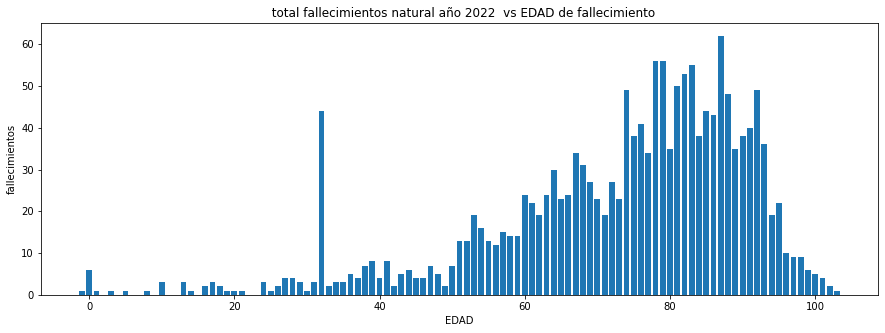

In [20]:
subset_df
Natural_year_edad = subset_df.groupby(["YEAR","Edad"]).size()
Natural_year_edad.columns = ["AÑO","EDAD","Total_fallecimiento_natural"]
Natural_year_edad

years = ["2016","2017","2018","2019","2020","2021","2022"]
Natural_per_year = []

for year in years:
    Natural_per_year.append(Natural_year_edad[year].reset_index())

Natural_per_year

for i , Natural_y in enumerate(Natural_per_year): 
    Natural_y.columns = ["EDAD","Total_fallecimiento_natural"] #rename column
    print("cantidad de fallecidos", Natural_y["Total_fallecimiento_natural"].sum())
    print(Natural_y.describe())
  

    #plot with matplotlib
    plt.figure(figsize=(15,5))
    plt.bar(Natural_y["EDAD"],Natural_y["Total_fallecimiento_natural"])
    plt.ylabel("fallecimientos")
    plt.xlabel("EDAD")
    plt.title("  total fallecimientos natural año {}  vs EDAD de fallecimiento".format(years[i]))
    plt.show()

#plot with matplotlib
#s = sns.FacetGrid(Natural_year_edad ,col = "AÑO", height=8, aspect=0.8, col_wrap = 2 ) #col_wrap div the grid in 3 columns 
#s.map(sns.barplot,"EDAD","Total_fallecimiento_natural")

**Nota** Se encontró que el comportamiento general es el esperado, una mayor concentración de fallecimientoes entre los 60 y 100 años, sin embargo, hay una edad en particular, que contiene la mayor cantidad de muertes por causa natural que no sigue el patrón, esta es una edad entre los 20 y 30 años (aún no se especifica, posiblemente 25 años),  este comportamiento se encontró en 2016, 2018, 2019, 2020, 2021. En 2022 tambíen tiene un comportamiento irregular pero no es el mayor.  

Se revisará esto por meses, para observar si un mes en especifico contiene mayor cantidad de defunciones en las edades presentadas para causas naturales 

Además se revisaran los datos por regiones 

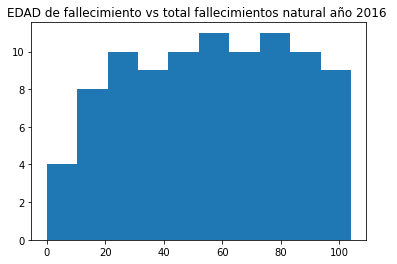

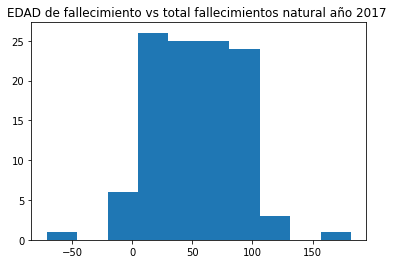

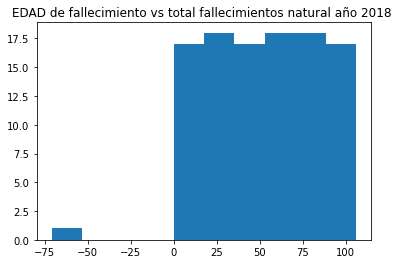

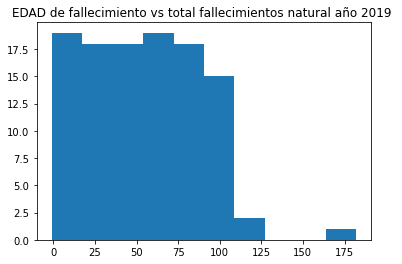

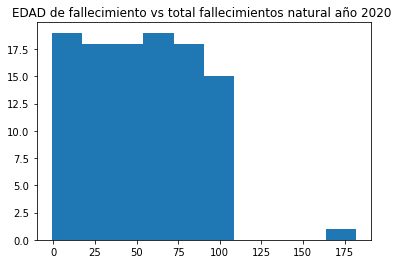

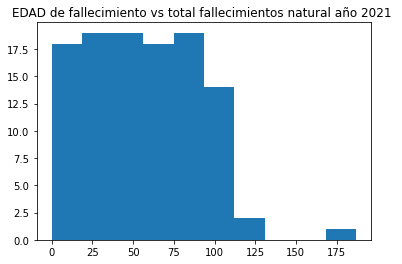

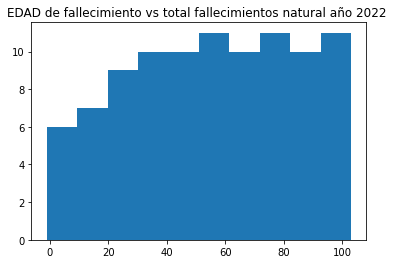

In [21]:
for i , Natural_y in enumerate(Natural_per_year): 
    Natural_y.columns = ["EDAD","Total_fallecimiento_natural"] #rename column 
  

    #plot with matplotlib
    plt.figure()
    plt.hist(Natural_y["EDAD"])
    #plt.hist(Natural_y["Total_fallecimiento_natural"])
    #plt.ylabel("fallecimientos")
    #plt.xlabel("EDAD")
    plt.title("EDAD de fallecimiento vs total fallecimientos natural año {} ".format(years[i]))
    plt.show()

## Revisión de Muertes por municipio 

Se revisaran primero las muertes totales por municipio, luego las muertes naturales por municipio, por último las edades de los fallecimientos por municipio (todo esto por año) 

**Nota** Para lograr esto se tuvo que buscar el dataset de los códigos en la base de datos del DANE

In [22]:
df_copy_p  = df_personas.copy()
municipios.head()
#quiero agregar el dapartamento y municipio como una columna 
#idea: utilizar un apply para colocar el municipio y departamento de ese código 
def dep(codigo):
    if codigo == "NO DISPONIBLE":
        depa = "NO DISPONIBLE"
    else:
        codigo = int(codigo)
        depa = municipios[municipios["CÓDIGO"]==codigo]["DEPARTAMENTO"]
        return list(depa)[0]
def mun(codigo):
    if codigo == "NO DISPONIBLE":
        return "NO DISPONIBLE"
    else: 
        codigo = int(codigo)
        muni = municipios[municipios["CÓDIGO"]==codigo]["MUNICIPIO"]
        return list(muni)[0]


df_copy_p["DEPARTAMENTO"] = df_copy_p["Ciudad Fallecimiento"].apply(dep)
df_copy_p["MUNICIPIO"] = df_copy_p["Ciudad Fallecimiento"].apply(mun)

df_copy_p.head()


,DocNum,Tipo Prestacion,CreateDate,DocEntry,Ciudad Fallecimiento,Fecha Fallecimiento,Edad,Causa,Parentesco,DEPARTAMENTO,MUNICIPIO
0,2002468,Previsión Exequial,10/05/2019,7576.0,11001.0,10/05/2019,26,ACCIDENTAL,HIJO (A),BOGOTA D.C.,BOGOTÁ D.C.
1,2025926,No Prestado,13/02/2022,463523.0,13430.0,12/02/2022,68,NATURAL,ABUELO (A),BOLIVAR,MAGANGUÉ
2,2025551,No Prestado,30/01/2022,23746.0,25307.0,30/01/2022,84,NATURAL,MADRE,CUNDINAMARCA,GIRARDOT
3,2025373,No Prestado,24/01/2022,49526.0,5001.0,24/01/2022,32,NATURAL,ESPOSO (A),ANTIOQUIA,MEDELLIN
4,2025790,Particular,7/02/2022,NO DISPONIBLE,76001.0,6/02/2022,66,NATURAL,OTRO,VALLE DEL CAUCA,CALI


In [23]:
#Agrupar por DEPARTAMENTO 

DEPTO = df_copy_p.groupby("DEPARTAMENTO").size().reset_index()
DEPTO.head()

,DEPARTAMENTO,0
0,AMAZONAS,59
1,ANTIOQUIA,1552
2,ARAUCA,40
3,ATLANTICO,2932
4,BOGOTA D.C.,6865


Text(0.5, 1.0, 'total fallecimientos vs DEPARTAMENTO')

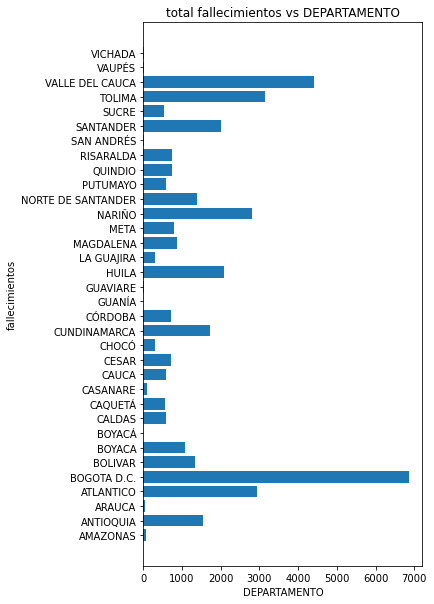

In [24]:
#GRAFICA DE FALLECIMIENTOS POR DEPARTAMENTO
DEPTO.columns = ["DEPARTAMENTO","Total_fallecimientos"] #rename column 
#YEAR["YEAR"] = YEAR["YEAR"].astype(str)

#plot with matplotlib
plt.figure(figsize=(5,10))
plt.barh(DEPTO["DEPARTAMENTO"],DEPTO["Total_fallecimientos"])
plt.ylabel("fallecimientos")
plt.xlabel("DEPARTAMENTO")
plt.title("total fallecimientos vs DEPARTAMENTO")

In [25]:
#Cantidad de muertes por meses 

df_copy  = df_personas.copy()
df_copy["Fecha Fallecimiento"] = pd.to_datetime(df_copy["Fecha Fallecimiento"])
df_copy["MES"] = df_copy["Fecha Fallecimiento"].dt.to_period('M')
MESES = df_copy.groupby("MES").size().reset_index()
MESES.head()

,MES,0
0,2016-01,39
1,2016-02,30
2,2016-03,31
3,2016-04,40
4,2016-05,28


Text(0.5, 1.0, 'MES de fallecimiento vs total fallecimientos')

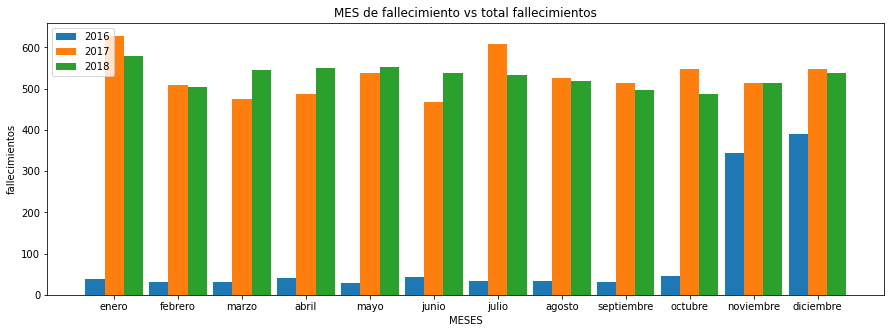

In [26]:
#GRAFICA DE FALLECIMIENTOS POR MES 
MESES.columns = ["MES","Total_fallecimientos"] #rename column 
MESES["MES"] = MESES["MES"].astype(str)
n_grupos = 12
indice_barra = np.arange(n_grupos)
ancho_barra = 0.3
#plot with matplotlib
plt.figure(figsize=(15,5))
plt.bar(indice_barra  ,MESES["Total_fallecimientos"][:12], width = ancho_barra,label="2016")
plt.bar(indice_barra + ancho_barra,MESES["Total_fallecimientos"][12:24], width = ancho_barra, label = "2017")
plt.bar(indice_barra + 2*ancho_barra ,MESES["Total_fallecimientos"][24:36], width = ancho_barra,label="2018")


plt.ylabel("fallecimientos")
plt.xlabel("MESES")
plt.legend(loc='best')
plt.xticks(indice_barra + ancho_barra, ('enero', 'febrero', 'marzo', 'abril','mayo','junio'
                                          ,'julio','agosto','septiembre','octubre','noviembre',
                                         'diciembre'))
plt.title("MES de fallecimiento vs total fallecimientos")

Text(0.5, 1.0, 'MES de fallecimiento vs total fallecimientos')

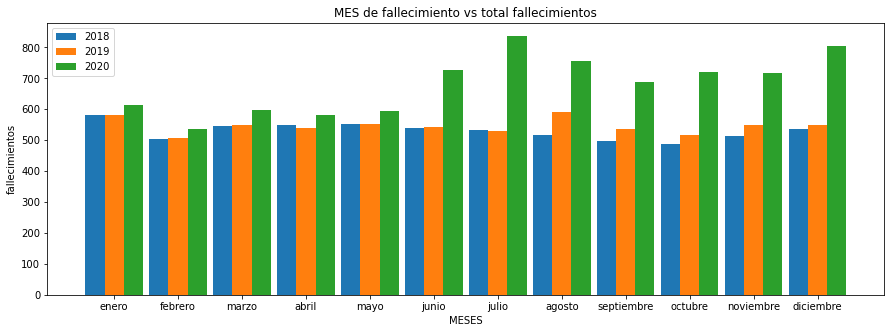

In [27]:
plt.figure(figsize=(15,5))
plt.bar(indice_barra  ,MESES["Total_fallecimientos"][24:36], width = ancho_barra,label="2018")
plt.bar(indice_barra + ancho_barra,MESES["Total_fallecimientos"][36:48], width = ancho_barra, label = "2019")
plt.bar(indice_barra + 2*ancho_barra ,MESES["Total_fallecimientos"][48:60], width = ancho_barra,label="2020")


plt.ylabel("fallecimientos")
plt.xlabel("MESES")
plt.legend(loc='best')
plt.xticks(indice_barra + ancho_barra, ('enero', 'febrero', 'marzo', 'abril','mayo','junio'
                                          ,'julio','agosto','septiembre','octubre','noviembre',
                                         'diciembre'))
plt.title("MES de fallecimiento vs total fallecimientos")

Text(0.5, 1.0, 'MES de fallecimiento vs total fallecimientos')

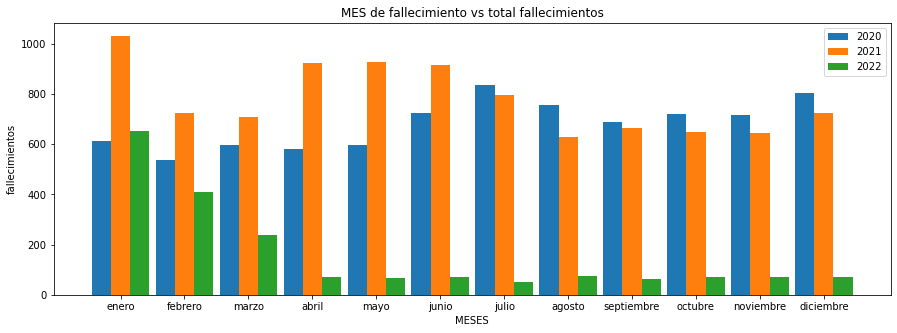

In [28]:
plt.figure(figsize=(15,5))
plt.bar(indice_barra  ,MESES["Total_fallecimientos"][48:60], width = ancho_barra,label="2020")
plt.bar(indice_barra + ancho_barra,MESES["Total_fallecimientos"][60:72], width = ancho_barra, label = "2021")
plt.bar(indice_barra + 2*ancho_barra ,MESES["Total_fallecimientos"][72:84], width = ancho_barra,label="2022")


plt.ylabel("fallecimientos")
plt.xlabel("MESES")
plt.legend(loc='best')
plt.xticks(indice_barra + ancho_barra, ('enero', 'febrero', 'marzo', 'abril','mayo','junio'
                                          ,'julio','agosto','septiembre','octubre','noviembre',
                                         'diciembre'))
plt.title("MES de fallecimiento vs total fallecimientos")

Text(0.5, 1.0, 'Edades de fallecimiento vs total fallecimientos')

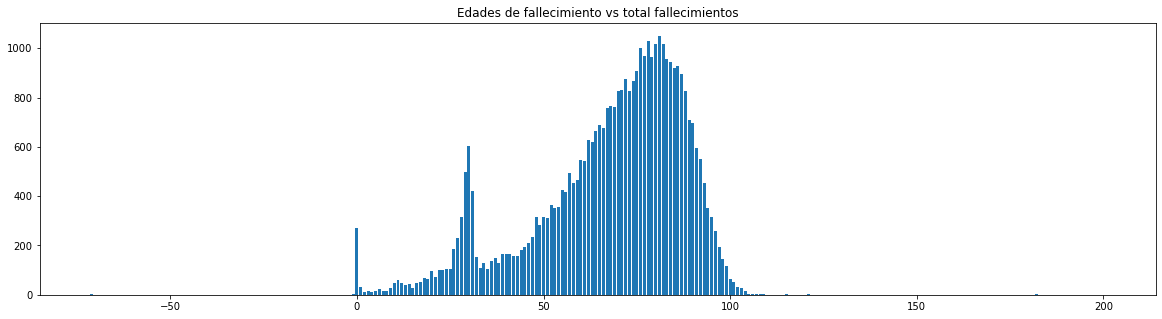

In [29]:
# relaciones por edad 

Serfun.isna().any()
Edades = df_personas.groupby('Edad').size().reset_index()
Edades

Edades.columns = ["Edades","Total_fallecimientos"] #rename column 
#accident_hour["HOUR"] = accident_hour["HOUR"].astype(str) #the column "HOUR" is transformed to string 

#plot with matplotlib
plt.figure(figsize=(20,5))
plt.bar(Edades["Edades"],Edades["Total_fallecimientos"])
#plt.ylabel("fallecimientos")
#plt.xlabel("Edades del fallecimiento")
plt.title("Edades de fallecimiento vs total fallecimientos")

In [30]:
Edades = df_personas.groupby('Edad').size().reset_index()
Edades.describe()

,Edad,0
count,120.000000,120.000000
mean,57.991667,331.508333
std,41.373173,335.024695
min,-71.000000,1.000000
25%,26.750000,45.750000
50%,56.500000,183.000000
75%,86.250000,598.000000
max,200.000000,1050.000000


Se encuntran valores atípicos en los datos de edades para personas, tales como un máximo de edad de 200 años, y mínimos de -71 años. Preguntar si los valores negativos tienen algún sentido y si los datos por encima de 100 que tan confiables serían (notar que las cantidades no son tantas a lo largo del tiempo. revisar estas estadíticas y graficas por año, para encontrar los años que tienen dichos valores, econtrar posibles soluciones a este caso como cambio de empleados, mal registro en un año en específico o algo así 